Code credits - **Karthik Narayan Mohan**

# Visualization of graph

3


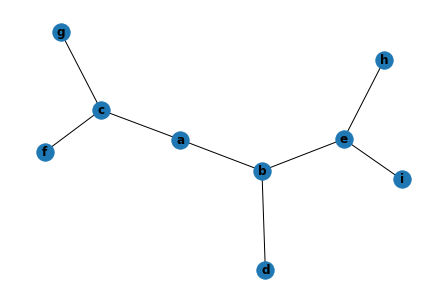

In [83]:
import networkx as nx
import math
import matplotlib.pyplot as plt
explored = []
frontier = []
b = 2 # b=2 for trees
d = 2 #depth of solution
graph = {
    'a': ['b','c'],
    'b': ['d','e'],
    'c': ['f','g'],
    'd': [],
    'e': ['h','i'],
    'f': [],
    'g': [],
    'h': [],
    'i': []}
G = nx.Graph()
for value in graph.keys():
    for i in range(len(graph[value])):
        G.add_edge(value,graph[value][i])
nx.draw(G, with_labels = True, font_weight = 'bold')




### Calculation of Max Depth

In [84]:
nodes = len(graph)
m = math.floor((math.log2(nodes))) #max depth
print(m)

3


## Breadth First Search

In [85]:
def bfs(explored,graph,initial_state,goal_state):
    explored.append(initial_state)
    frontier.append(initial_state)
    while frontier:
        if goal_state == frontier[0]:
            element = frontier.pop(0)
            print(element,end = " ")
            return
        else:
            element = frontier.pop(0)
            print(element, end = " ")
              
            
     
        for adj in graph[element]:
            if adj not in explored:
                explored.append(adj)
                frontier.append(adj)
print("Breadth First Search: ")
bfs(explored,graph,'a','d')


Breadth First Search: 
a b c d 

## Depth First Search

In [86]:
explored = set()
def dfs(explored,graph,initial_state,goal_state):
    if initial_state not in explored:
        print(initial_state, end = " ")
        if initial_state == goal_state:
            return
        explored.add(initial_state)
        for adj in graph[initial_state]:
            if adj == goal_state:
                print(adj,end = " ")
                return
            dfs(explored,graph,adj,goal_state)
print("Depth First Search: ")
dfs(explored,graph,'a','c')

Depth First Search: 
a b d e h i c 

## Depth Limited Search

In [87]:
explored = set()

def dls(explored, graph, current_state, goal_state, depth_limit):
    if current_state not in explored and depth_limit >= 0:
        if current_state == goal_state:
            print(current_state, end=" ")
            return True
        else:
            print(current_state, end=" ")
        explored.add(current_state)
        if depth_limit > 0:
            found_goal = False
            for adj in graph[current_state]:
                if dls(explored, graph, adj, goal_state, depth_limit - 1):
                    found_goal = True
                    break
            return found_goal
    return False

def depth_limited_search(graph, initial_state, goal_state, depth_limit):
    print("Depth Limited Search:")
    if not dls(explored, graph, initial_state, goal_state, depth_limit):
        print("\nGoal state not found.")


depth_limited_search(graph, 'a','g', 1)


Depth Limited Search:
a b c 
Goal state not found.


## Iterative Deepening Seach

In [70]:
explored = set()

def dls(graph, current_state, goal_state, depth_limit):
    global explored
    
    if current_state == goal_state:
        print(current_state, end=" ")
        return True
    
    if current_state not in explored:
        print(current_state, end=" ")
        explored.add(current_state)
        if depth_limit > 0:
            found_goal = False
            for adj in graph[current_state]:
                if dls(graph, adj, goal_state, depth_limit - 1):
                    found_goal = True
                    break
            return found_goal
        
    return False

def iterative_deepening_search(graph, initial_state, goal_state, max_depth):
    global explored
    print("Iterative Deepening Search:")
    for depth_limit in range(max_depth + 1):
        explored.clear()  
        print("\nTill depth " + str(depth_limit) + ":")
        if dls(graph, initial_state, goal_state, depth_limit):
            print("\n\nGoal state reached at Depth "  + str(depth_limit))
            return

iterative_deepening_search(graph, 'a','g', 5)


Iterative Deepening Search:

Till depth 0:
a 
Till depth 1:
a b c 
Till depth 2:
a b d e c f g 

Goal state reached at Depth 2


## Weighted Graph

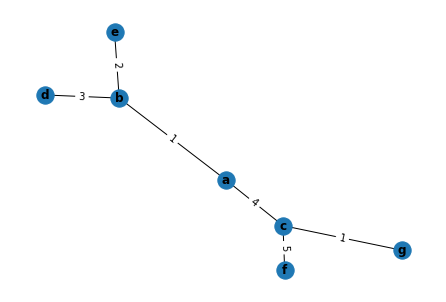

In [15]:
import networkx as nx

weighted_graph = {
    'a': [('b', 1), ('c', 4)],
    'b': [('d', 3), ('e', 2)],
    'c': [('f', 5), ('g', 1)],
    'd': [],
    'e': [],
    'f': [],
    'g': []
}

G = nx.Graph()
for value in weighted_graph.keys():
    for neighbor, weight in weighted_graph[value]:
        G.add_edge(value, neighbor, weight=weight)

pos = nx.spring_layout(G)  
nx.draw(G, pos, with_labels=True, font_weight='bold')

edge_labels = nx.get_edge_attributes(G, 'weight')
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)

import matplotlib.pyplot as plt
plt.show()


## Uniform Cost Search


In [18]:
explored = set()

def ucs(explored, weighted_graph, current_state, goal_state):
    frontier = [(0, current_state)]  
    while frontier:
        frontier.sort() 
        cost, state = frontier.pop(0)
        if state not in explored:
            explored.add(state)
            print(state, end=" ")
            if state == goal_state:
                return True
            for neighbor, weight in weighted_graph[state]:
                frontier.append((cost + weight, neighbor))
    return False

def uniform_cost_search(weighted_graph, initial_state, goal_state):
    print("Uniform Cost Search: ")
    ucs(explored, weighted_graph, initial_state, goal_state)


uniform_cost_search(weighted_graph, 'a', 'g')


Uniform Cost Search: 
a b e c d g 